In [1]:
%matplotlib inline
import datetime as dt
import numpy as np
import pandas as pd

import datetime

# Monitoria

12/05/2017

Pedro Montero Mattos

pmattos90@gmail.com

# Programming Basics

Our target here is a very applied introduction to programming

## Variables

Memory storage

* integer
* float
* strings

## Basic Operations

* if
* while
* arithmetic


# Python

## Setup

If you have never used python you must set up an evironment. This is way easier than what it sounds like.

You need:

* A interpreter to run the code installed. You can install the [Anaconda](https://www.continuum.io/downloads) distribution that brings along several useful packages
* An IDE to write your code. I personally recommend [PyCharm](https://www.jetbrains.com/pycharm/) but along with Anaconda comes Spyder that is also widely used.

## Syntax

Instead of using parenthesis python used identation to isolate operations

For example an if clause looks like:

In [2]:
someCondition = True

if someCondition is True:
    x=0 # Commands

## Pandas

Since there are so few basic operations and syntaxes details pure programming in any language is trivial. Usually coders do not tend to re-write things there have been extensively studied and re-written. A great portion of ready-to-use third-party written code is usually referred to as a `Package` (in python) or `Frameworks` (more generally) .

Frameworks can vary greatly from language to langue and as a consequence it may seem very different to code using different programming languages.

`Pandas` is a widely-known python package and it is taken as one of the best tools to handle datasets. It can perform highly complex operations in little time and with low coding complexity.

`Pandas` was developed by a former hedge fund trader, thus very speed oriented.

### Series

[Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

``Series`` are pandas' most basic structure. It is somewhat similar to an array, in the sense that it is a 1-dimension series of values.

A pandas Series is comprised of (i) a series of values, called ``data`` and (ii) an index.

The index is another series of values that identify every value in the data.

### DataFrames

[Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

``DataFrames`` are the most common structured used (even for 1-dimensional datasets) because there are more functions implemented to DataFrames.

Just like ``Series``, ``DataFrames`` have ``data`` and an ``index``, but since DataFrames can be multi-dimensional they also have e ``columns attribute``.

A simple DataFrame looks like a matrix.

In the following example we will load data from an Excel sheet and do some manipulation with it to show how powerful ``pandas`` is.

In [3]:
data1 = pd.read_excel('SeriesTemporaisHardcoded.xlsx')
data1.head()

,IHFAIHFA Index,Unnamed: 1
0,2007-09-28,982.51
1,2007-10-01,984.08
2,2007-10-02,984.05
3,2007-10-03,983.49
4,2007-10-04,983.59


The function ``head`` above shows us the first 5 records of the DataFrame.

So far our index is a sequence of integers (0,1,2 ... )
We have two columns (IHFAIHFA Index and Unamed: 1)
And to series of data. One comprised of dates and the other comprised of the prices for the security.

Ideally we'd like the dates to be the index and a single column to contain the prices and be named like the security.

First, when we want one of the columns to become the index we use the `set_index` function:

In [4]:
data1.set_index("IHFAIHFA Index", inplace = True)
data1.head()

,Unnamed: 1
IHFAIHFA Index,
2007-09-28,982.51
2007-10-01,984.08
2007-10-02,984.05
2007-10-03,983.49
2007-10-04,983.59


Now we want the index to be named "Dates" and the columns to be name as the security. 

In [5]:
data1.index.name = "Dates"
data1.columns = ["IHFAIHFA Index"]

data1.head()

,IHFAIHFA Index
Dates,
2007-09-28,982.51
2007-10-01,984.08
2007-10-02,984.05
2007-10-03,983.49
2007-10-04,983.59


Suppose now that we want to glance at the data. Plottins is extremely easy with pandas:

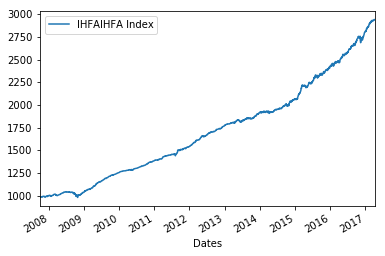

In [6]:
data1.plot()

### Syncronizing Data

Now let's load another series of data points to see how easy it is to concatenate data using pandas. After loading we will put it through a similar manipulation procedure. Note that this time we specified a ``sheetname`` since we no longer want data from the first sheet.

In [7]:
data2 = pd.read_excel('SeriesTemporaisHardcoded.xlsx', sheetname="RealBonds")
data2.set_index("BZRFIB5+ Index", inplace = True)
data2.index.name = "Dates"
data2.columns = ["BZRFIB5+ Index"]
data2.head()

,BZRFIB5+ Index
Dates,
2003-09-16,715.676
2003-09-17,715.758
2003-09-18,716.809
2003-09-19,719.084
2003-09-22,720.711


Looking closely we can note that the dates are not the same for the two stocks:

In [8]:
data1.head()

,IHFAIHFA Index
Dates,
2007-09-28,982.51
2007-10-01,984.08
2007-10-02,984.05
2007-10-03,983.49
2007-10-04,983.59


Ideally we would like to create a single DataFrame in which prices are aligned to its corresponding dates. This can easily be achieved with pandas:

In [9]:
data = pd.concat([data1, data2], axis=1)
data.tail()

,IHFAIHFA Index,BZRFIB5+ Index
Dates,,
2017-04-07,2938.84,6054.162
2017-04-10,NaN,6085.555
2017-04-11,NaN,6077.123
2017-04-12,NaN,6093.135
2017-04-13,NaN,6075.976


Note that this time we used the ``tail`` function to see the last 5 entries, instead of the first 5 as when we used ``head``.

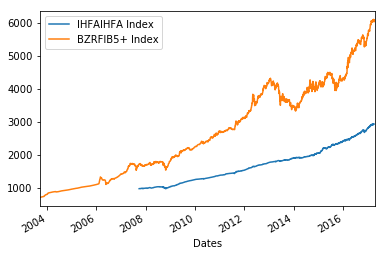

In [10]:
data.plot()

Now we would like to work only with datapoints that have prices for both series. We can create select our desired sample by using the ``loc`` function. This function let's you specify which index points are to be used.

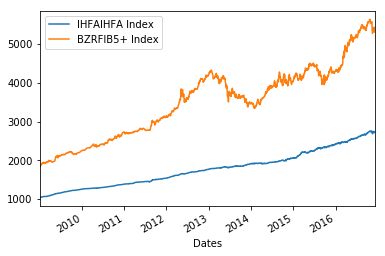

In [11]:
data = data.loc[dt.datetime(2009,1,1):dt.datetime(2016,12,1)]
data.plot()

### Calculating daily returns

Arithmetic operations are very easy with ``pandas``.

For example to calculate daily returns we can use the ``shift`` function (that shifts the entire series the number of steps desired) and perform the calculation:

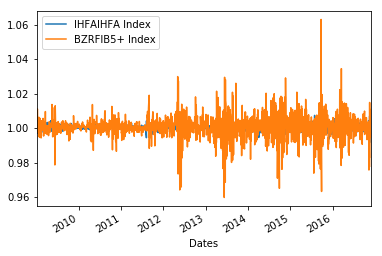

In [12]:
dailyReturns = data / data.shift(1)
dailyReturns.plot()

### 1-Month returns

If for example we want monthly returns instead, first we transform our daily series into monthly series. We get the last price for every month:

To see the different possible frequencies check [this link](http://stackoverflow.com/questions/17001389/pandas-resample-documentation)

In [13]:
monthlyData = data.resample('M').last()
monthlyData.head()

,IHFAIHFA Index,BZRFIB5+ Index
Dates,,
2009-01-31,1059.56,1935.301
2009-02-28,1071.63,1955.859
2009-03-31,1086.56,1988.514
2009-04-30,1118.67,1964.813
2009-05-31,1144.99,2105.324


Now we calculate monthly returns just like daily returns

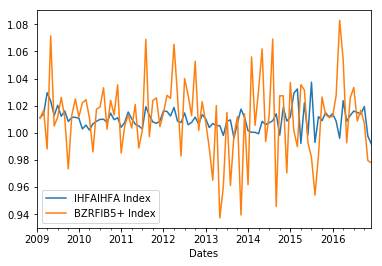

In [14]:
monthlyReturns = monthlyData / monthlyData.shift(1)
monthlyReturns.plot()

# GARCH Example

$$y_t = a_0 + a_1 y_{t-1} + \epsilon_t $$

$$\epsilon_t = \nu_t \sqrt{h_t} $$

$$ h_t = \alpha_0 + \sum_{i=1}^{q}{\alpha_i \epsilon^2_{t-i}} + \sum^p_{t-i}\beta_i h_{t-1} $$

We will use the [``ARCH`` python package ](https://pypi.python.org/pypi/arch/4.0)

The documentation can be found [here](http://arch.readthedocs.io/en/latest/)

To install the package you have to open the windows promt (CMD) and rune the command

    pip install arch
    
For the model specification check [the docs](http://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html#specifying-common-models)

In [15]:
from arch import arch_model

## GARCH(1,1)

In [16]:
archData = dailyReturns.loc[dt.datetime(2016,1,1):dt.datetime(2016,12,1)]
archData = archData["IHFAIHFA Index"]

am = arch_model(archData, p=1, q=1)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     62,   Neg. LLF: -1073.0571085515476
Iteration:     10,   Func. Count:    134,   Neg. LLF: -1073.0573402714306
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1073.0573401870295
            Iterations: 14
            Function evaluations: 134
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:         IHFAIHFA Index   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                1073.06
Distribution:                  Normal   AIC:                          -2138.11
Method:            Maximum Likelihood   BIC:                          -2124.36
                                        No. Observations:                  230
Date:                Fri, May 12 2017   Df Residuals:                      22

C:\Anaconda3\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


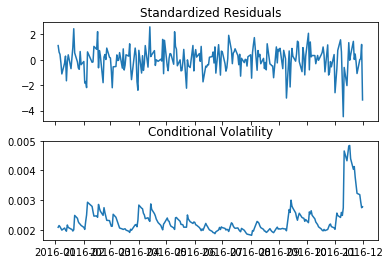

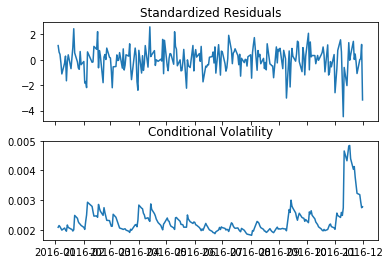

In [17]:
res.plot()

In [18]:
res.conf_int()

,lower,upper
mu,1.000547e+00,1.000548e+00
omega,5.786763e-07,5.789957e-07
alpha[1],-4.354273e-03,2.044224e-01
beta[1],7.186206e-01,8.813188e-01


## GARCH(2,2)

In [19]:
archData = dailyReturns.loc[dt.datetime(2016,1,1):dt.datetime(2016,12,1)]
archData = archData["IHFAIHFA Index"]

am = arch_model(archData, p=2, q=2)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     76,   Neg. LLF: -949.5865474498453
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1072.616455956645
            Iterations: 12
            Function evaluations: 134
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:         IHFAIHFA Index   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                1072.62
Distribution:                  Normal   AIC:                          -2133.23
Method:            Maximum Likelihood   BIC:                          -2112.60
                                        No. Observations:                  230
Date:                Fri, May 12 2017   Df Residuals:                      224
Time:                        19:21:33   Df Model:                            6
     

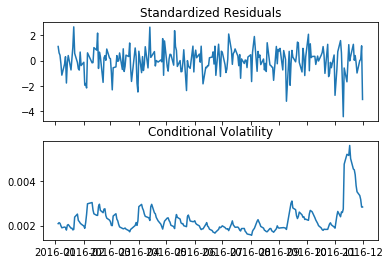

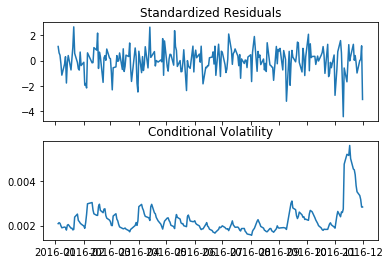

In [20]:
res.plot()

In [21]:
res.conf_int()

,lower,upper
mu,1.000531e+00,1.000536e+00
omega,5.784640e-07,5.792453e-07
alpha[1],-1.396833e-01,3.396830e-01
alpha[2],-9.113217e-02,2.911319e-01
beta[1],-6.772153e-01,1.377214e+00
beta[2],-5.222144e-01,1.222213e+00
